<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Kmean_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
######################

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

1) K-means with test data 


In [134]:
data = np.loadtxt("data_kmeans.txt")
np.random.shuffle(data)

In [135]:
#function i will use for math 
def indicator(A,B):
  I = 0
  if A == B:
    I = 1
  else:
    I = 0

  return I

# found on stack overflow 
def sigma_sum(start, end, expression):
    return sum(expression(i) for i in range(start, end))


In [136]:
##################
#Definitions#
#  X -> Represengts the Data Input 
#  K -> Represents the # of cluster
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
#  J -> number of centroids which is equal to K
##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [137]:
##################
#Definitions#
#  X -> Represengts the Data Input 
X_train = data[:200,:]
X_test = data[200:,:]

#  K -> Represents the # of cluster
K = 3
#  I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
I = 300
I_train = 200
I_test = 100
#  J -> number of centroids which is equal to K
J = K
# N -> number of features
N = 2
# initialize the array which will contain the distance
D = np.zeros((I_train,K))


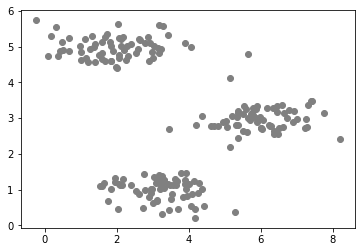

In [138]:
# inialize and standardize the data
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")

In [139]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
max_x = np.max(X_train[:,0])
min_x = np.min(X_train[:,0])

max_y = np.max(X_train[:,1])
min_y = np.min(X_train[:,1])
# we compute mu :
mu_x = [ np.random.uniform(min_x,max_x) for mu in range(J) ] 
mu_y = [ np.random.uniform(min_y,max_y) for mu in range(J) ] 
mu = np.array((mu_x,mu_y)).T
print(mu)

[[8.10640862 1.55762967]
 [6.66535346 5.38842816]
 [6.84467764 3.30738771]]


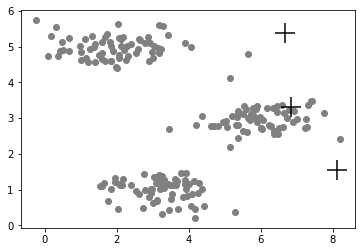

In [140]:
# visualisation:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [141]:
######################################
# compute the distance between each point and each centroid and stock it in a distance array named D using the norm 2 
# D is of dimension I * K because for each point (I point) we have K distance ( one for each centroid)


def distance(I_train,K,mu,X_train,D):
  for i in range(I_train):
    for j in range(K):
        D[i,j] = (X_train[i,0] - mu[j,0])**2 + (X_train[i,1] - mu[j,1])**2

  return D

###### update the centroid by computing the barycenter of the point assigned to that centroid
def update_center(X_train,yes,mu,K,I_train):
  for k in range(K):
     mu[k,0] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,0]) /  sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,1] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,1]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
  return mu


In [142]:
######################################
# repeat the training for 10 iteration, it will be enough to reach convergence
for h in range(10):
  D = distance(I_train,K,mu,X_train,D)
  yes = np.argmin(D,axis=1)
  mu = update_center(X_train,yes,mu,K,I_train)


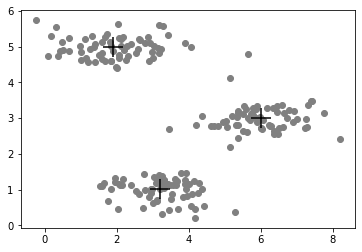

In [143]:
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")
plt.scatter(mu[:,0],mu[:,1],s=400,marker='+',c="black")

In [144]:
#this part was a part of the lab, we will now test K-means on some real data.

## **2.1 K-means:Clustering some real data**

In [185]:
data=pd.read_csv("grade_students.csv")
data_array = data.to_numpy()

In [203]:
######################################
# compute the distance between each point and each centroid and stock it in a distance array named D using the norm 2 
# D is of dimension I * K because for each point (I point) we have K distance ( one for each centroid)


def distance2(I_train,K,mu,X_train,D):
  for i in range(I_train):
    for j in range(K):
        D[i,j] = (X_train[i,0] - mu[j,0])**2 + (X_train[i,1] - mu[j,1])**2 + (X_train[i,2] - mu[j,2])**2 + (X_train[i,3] - mu[j,3])**2 + (X_train[i,4] - mu[j,4])**2 + (X_train[i,5] - mu[j,5])**2
  return D

###### update the centroid by computing the barycenter of the point assigned to that centroid
def update_center2(X_train,yes,mu,K,I_train):
  for k in range(K):
     mu[k,0] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,0]) /  sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,1] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,1]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,2] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,2]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,3] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,3]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,4] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,4]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
     mu[k,5] = sigma_sum(0,I_train, lambda i: indicator(yes[i],k)*X_train[i,5]) / sigma_sum(0,I_train, lambda i: indicator(yes[i],k))
  return mu


all the function used in this part were written above.

In [204]:
##################
#Definitions#
# data #  X -> Represents the Data Input 
K = 3#  K -> Represents the # of cluster 
I = 5550 # I -> Represents the # of element in the Input matrix X = {x1, x2, ..., xI}
J = K  #  J -> number of centroids which is equal to K
N = 6 # number of feature

# initialize the array which will contain the distance
D = np.zeros((I,K))

##################
# inialize and standardize the data
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
### compute the distance between each point for each centroid
#### compute the argmin of the distance between each point and each centroid
##### assign each point to the closest centroid
###### update the centroid by computing the barycenter of the point assigned to that centroid

In [205]:
# inialize and standardize the data
print(data.shape)
data.head()

(5550, 6)


,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426


In [206]:
print(min(data["g1freelunch"]),max(data["g1freelunch"]))
print(min(data["g1absent"]),max(data["g1absent"]))
print(min(data["g1readscore"]),max(data["g1readscore"]))
print(min(data["g1mathscore"]),max(data["g1mathscore"]))
print(min(data["g1listeningscore"]),max(data["g1listeningscore"]))
print(min(data["g1wordscore"]),max(data["g1wordscore"]))
print("We have an idea of how the value the data can take for each feature, we can initialize our centroid around such value ")

0 1
0 84
404 651
404 676
477 708
317 601
We have an idea of how the value the data can take for each feature, we can initialize our centroid around such value 


In [207]:
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK
# we have three cluster namely Weak, Average and Gifted 
# We have 6 different criteria to build our cluster 
# We should have 3 different centroid, each of a dimension 6.

In [208]:
###############################################
## Initialize each cluster centroids which are mu1 mu2 mu3 ... muK:

# We will take the min and max value of our data and take random centroid between the min and max of our data coordinate:
# we know the max and min of each column of our dataframe 

# we compute mu :
mu_x = [ np.random.uniform(0,1) for mu in range(J) ] 
mu_y = [ np.random.uniform(0,84) for mu in range(J) ] 
mu_z = [ np.random.uniform(404,651) for mu in range(J) ] 
mu_w = [ np.random.uniform(404,676) for mu in range(J) ] 
mu_u = [ np.random.uniform(477,708) for mu in range(J) ] 
mu_t = [ np.random.uniform(317,601) for mu in range(J) ] 
mu = np.array((mu_x,mu_y,mu_z,mu_w,mu_u,mu_t)).T
print(mu)
# we can verify that our mu have the right dimension namely 3*6 or J*N
mu.shape

[[4.03559028e-01 3.39859593e+01 6.48439451e+02 4.27152262e+02
  6.12800149e+02 5.16843797e+02]
 [3.05883122e-01 7.74708220e+01 6.37938387e+02 4.13729104e+02
  6.43269316e+02 3.90749048e+02]
 [2.97612918e-01 7.52910125e+01 6.38274023e+02 4.56920690e+02
  6.49007739e+02 4.85297647e+02]]


(3, 6)

In [209]:
# we shall do a hundred iteration as it enough
# we could create a while loop with a condition until convergence but it is easier without 
for g in range(50):
### compute the distance between each point for each centroid
  D = distance2(I,K,mu,data_array,D)
#### compute the argmin of the distance between each point and each centroid yes = (y es)timated
  yes = np.argmin(D,axis=1)
#### update the centroid by computing the barycenter of the point assigned to that centroid
  mu = update_center2(data_array,yes,mu,K,I)



In [222]:
# we order the cluster based on the best score which means the cluster with the best score will be named gifted then average then finally weak
mu_data = pd.DataFrame(mu[mu[:,1].argsort()], index=['Gifted', 'Average', 'Weak'], columns=data.columns)
mu_data.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
Gifted,0.252149,6.608166,577.361032,580.020057,595.224928,599.065903
Average,0.471983,6.929741,520.566810,521.748707,535.351724,569.915517
Weak,0.726827,8.661941,457.386041,464.484188,491.586696,541.398582


In [1]:
###############################################
#Interpretation 
# we can see that we obtain three different cluster where the level of the student is different 
# so we can meaningfully classify our data based on the level of the student.
# We can then observe that there is a difference between the number of absence of a gifted children vs average and weak 
# but the difference is not to great so the absence is not a really good indicator of the children level

# The most meaningful interpretation we can do is when we look at the freelunch 
# gifted children have generally not access to freelunch 
# while the majority of weak children have access to freelunch 

# we can conclude that people who do not have access to free lunch are wealthier than the rest 
# and it seem wealthy children have better result
# this show that the social background of a children matter a lot in his result 


# 2.2 PCA : Reducing the dimension of some synthetic data

In [23]:
X = np.loadtxt("data_pca.txt")
np.random.shuffle(X)

In [24]:
X.shape
X_train = X[:30,:]
X_test = X[30:,:]

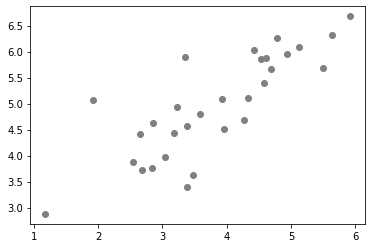

In [25]:
# we will train our data on this 
plt.scatter(X_train[:,:1],X_train[:,1:2], c="grey")

In [106]:
# this first function give a list of all eigenvector and eigenvalue up to the newdimension
def PCA(X,newdim):
    # calculating the mean of the data
    mean = np.mean(X,axis=0)
    # centering the origin on the mean value
    X = X - mean
        
    # calculating the covariance: 
    # we directly use the numpy method to compute the covariance, then we take the 
    #transpose because the np.cov return a vector in the wrong shape
    cov = np.cov(X.T)
        
    # we compute the eigenvectors and eigenvalues
    #  finding the principal eigenvectors of the covariance using the numpy method linalg:
    
    eigval , eigvec = np.linalg.eig(cov)
        
    # we now need to sort the eigenvectors according to their eigenvalues:
    #which gives the best hyperplane onto which the data is projected
    # the eigenvectors needs to be transposed again because of np.linalg 
    eigvec = eigvec.T
    index = np.argsort(eigval)[::-1]
    eigval = eigval[index]
    eigvec = eigvec[index]

    return (eigval,eigvec)
        
# this function project the data        
def projection(X,eigvec,newdim):
    mean = np.mean(X,axis=0)
    # centering the origin on the mean value of the data 
    X = X - mean
    # getting the first vectors up to the dimension we want 
    components=eigvec[0:newdim]
    # we the data on the most important axis that we found by ordering the eigenvector before up to the dimensuin we want.
    return np.dot(X,components.T)
        

In [107]:
yes  = PCA(X_train,1)
y_train = projection(X_train,yes[1],1)
y_test =  projection(X_test,yes[1],1)
print(y_test)

[[-0.24174721]
 [-1.99587343]
 [-2.11485002]
 [-1.64638365]
 [-3.03568872]
 [ 0.4463686 ]
 [ 2.15729706]
 [ 1.75157768]
 [ 2.16758398]
 [ 1.21046544]
 [-1.23928548]
 [-0.10628165]
 [ 0.5817497 ]
 [-1.63493676]
 [ 0.60957175]
 [ 0.66194291]
 [ 0.5028533 ]
 [ 0.02108021]
 [ 0.35974327]
 [ 1.54481303]]


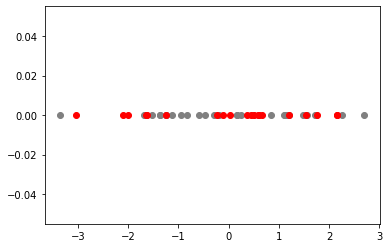

In [108]:
orig = np.zeros(y_train.shape[0])
orig2 = np.zeros(y_test.shape[0])
plt.scatter(y_train,orig, c="grey")
plt.scatter(y_test,orig2, c="red")
# here is the result of our training in grey and our test in red

# 2.3 PCA: Reducing the dimension of some real data

In [109]:
datapca=pd.read_csv("diabetes.csv")

In [110]:
diabete = datapca.to_numpy()
datapca.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
# we will reduce the dimension from 9 to 5 
yes  = PCA(diabete,8)
projected_diabete = projection(diabete,yes[1],5)
PCA_diabete = pd.DataFrame(projected_diabete)

In [111]:
PCA_diabete.head()


,0,1,2,3,4
0,-75.714249,35.954944,-7.260683,15.670527,-16.507978
1,-82.358466,-28.909559,-5.496649,9.004430,-3.480381
2,-74.630229,67.909633,19.461753,-5.653114,10.299176
3,11.077206,-34.900175,-0.053004,1.314561,7.619943
4,89.744156,2.751263,25.213059,18.995906,-8.525785


In [ ]:
#interpretation:
# the new data obtained by doing the PCA and reducing the dimension 
# cannot be directly understood now
# it is a new data that contain and retain most of the information of our old data 
# but we need to study it further to understand the meaning of the new data 
# what we can do is study our data before doing PCA to have a deep understanding of our data then use PCA to reduce the computing time 
# and the amount of data we have

# Once PCA is done we lose interpretability but we can clean our data by reducing the noise because we cut trivial dimension. 

"PCA does not discard any samples or characteristics (variables). Instead, it reduces the overwhelming number of dimensions by constructing principal components (PCs).
" PCs describe variation and account for the varied influences of the original characteristics. Such influences, or loadings,"
"can be traced back from the PCA plot to find out what produces the differences among clusters."

# this comment from a site i found online explain that the principal component that we keep still retain the influence of all the original data 
# even more so by only cutting the least interesting dimensions ( which is why ordering our eigenvalue is so important).
